![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)


# Convolutional Neural Networks (CNNs) Part - 1

#### Authors: Alexander Fred Ojala, Rajarathnam Balakrishnan

**Sources**: Francois Chollet, Aurélien Géron, etc.

**Refs**: 
- http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html
- https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/
- https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks
____

# Overview

#### 1. Why not use deep neural network with fully connected layers ?

#### 2. What is Convolution ?

#### 3. Convolutional Neural Network

##### |___ 3.1. Padding and Strides

##### |___ 3.2. Convolutional layers and Filters

##### |___ 3.3. Pooling layers

#### 4. Vanilla/Baseline CNN implementation for Image Classification

##### |___ 4.1. Data 

##### |___ 4.2. Model

##### |___ 4.3. Training

##### |___ 4.4. Testing

# 1. Why not use deep neural network with fully connected layers ?
- Fully connected layers would work for small images like the MNIST
- For larger images the number of parameters grows in huge numbers
- For example: a 200 * 200 pixel grayscale image has 40,000 pixels and if the first layer of the fully connected layer network has just 500 neurons then a total of 20 million connections exist for just the first layer.
- CNNs solve this with partially connected layers and weightsharing

# 2. What is Convolution ?

A convolution is an integral that expresses the amount of overlap of one function g as it is shifted over another function f. It therefore "blends" one function with another.
 
 ![](http://mathworld.wolfram.com/images/gifs/convrect.gif)
 
 ![](http://mathworld.wolfram.com/images/equations/Convolution/NumberedEquation1.gif)

## Matrix convolutions
![](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif)

# 3. Convolutional Neural Networks (CNNs)

CNNs are based on the idea of local receptive fields in the visual cortex being responsible for specific stimuli to a limited region of the visual field. Therefore an architecture consising of different layers each responsible for specific stimuli together is able to detect complex patterns in the visual field. Main building blocks of CNNs are:
1. Padding and Strides
2. Convolutional Layers and Filters
3. Pooling Layers

## 3.1 Strides and Padding

### Stride
> It is the unit of movement of the kernel or filter. Stride is 1 by default and always defined as an integer.

### Padding: `same`

> Zero padding is used when padding is set to `same` and for the following reasons:

- To obtain output size same as input size

![](http://deeplearning.net/software/theano/_images/same_padding_no_strides.gif)


- Or to obtain larger output size compared to the input size


![](http://deeplearning.net/software/theano/_images/full_padding_no_strides.gif)

### Padding: `valid`

> When set to `valid`, zeroes are not added resulting in neglecting some columns and rows at the extremes (also depends on the strides)

![](http://deeplearning.net/software/theano/_images/no_padding_no_strides.gif)

## 3.2 Convolutional Layers and Filters

> Convolutional layers enable feature reuse and weight sharing across layers to avoid too many parameters as compared to fully connected layers as we saw in the previous module on Neural Networks 

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Tensorflow 2.x
import tensorflow as tf
assert tf.__version__ >= '2.0'

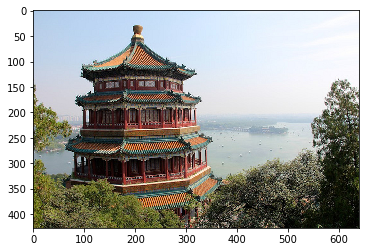

In [2]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china);

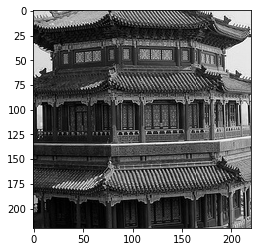

In [3]:
img = china[100:320,100:320]
height, width, channels = img.shape
image_grayscale = img.mean(axis=2).astype(np.float32)
image = image_grayscale.reshape(1,height, width, 1)
plt.imshow(image_grayscale, cmap='gray')

> Filters represent the local receptive field which are actually weights of neurons that are learned by the alogrithm when a CNN is trained. 

Following is an example where we create filters that can be used to detect horizontal and vertical lines and, cross filter patterns

In [4]:
# filters
fmap = np.zeros(shape=(7, 7, 1, 3), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
fmap[3, :, 0, 2] = 1
fmap[:, 3, 0, 2] = 1

# convolution operation
outputs = tf.nn.conv2d(image, fmap, strides=1, padding="SAME")

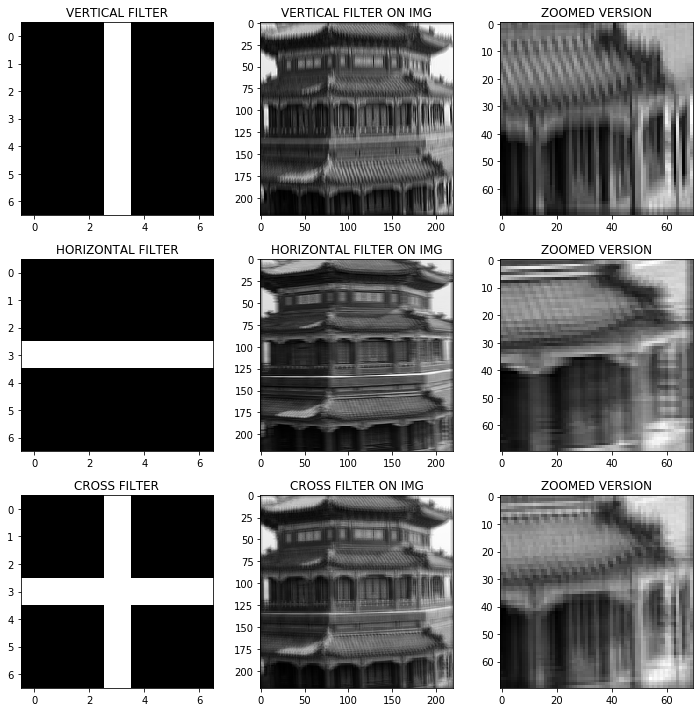

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))
axes[0,0].imshow(fmap[:, :, 0, 0], cmap='gray')
axes[0,0].set_title('VERTICAL FILTER')
axes[0,1].imshow(outputs[0, :, :, 0],interpolation='nearest', cmap='gray')
axes[0,1].set_title('VERTICAL FILTER ON IMG')
axes[0,2].imshow(outputs[0, :, :, 0][150:220, 150:250],interpolation='nearest', cmap='gray')
axes[0,2].set_title('ZOOMED VERSION')

axes[1,0].imshow(fmap[:, :, 0, 1],cmap='gray')
axes[1,0].set_title('HORIZONTAL FILTER')
axes[1,1].imshow(outputs[0, :, :, 1],interpolation='nearest', cmap='gray')
axes[1,1].set_title('HORIZONTAL FILTER ON IMG')
axes[1,2].imshow(outputs[0, :, :, 1][150:220, 150:250],interpolation='nearest', cmap='gray')
axes[1,2].set_title('ZOOMED VERSION')

axes[2,0].imshow(fmap[:, :, 0, 2], cmap='gray')
axes[2,0].set_title('CROSS FILTER')
axes[2,1].imshow(outputs[0, :, :, 2],interpolation='nearest', cmap='gray')
axes[2,1].set_title('CROSS FILTER ON IMG')
axes[2,2].imshow(outputs[0, :, :, 2][150:220, 150:250],interpolation='nearest', cmap='gray')
axes[2,2].set_title('ZOOMED VERSION')
plt.tight_layout()

## 3.3 Pooling Layers

 > Pooling layers are used to subsample input image to reduce computational load, memory usage, number of prameters
 
 - Pooling layers also require size, stride and padding type
 - Unlike convolutional layers, neurons in pooling layer does not have weights
 - Pooling layers involve aggregation functions like Maximum or Mean
 - Pooling layers also provide some level of invariance to small translations
 - One must be careful while implementing Pooling layers as excessive and uncontrolled use could destroy the input signals by diminishing the sampling

### Max Pooling

In [6]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)
output = max_pool(img.reshape(1,img.shape[0], img.shape[1], 3))

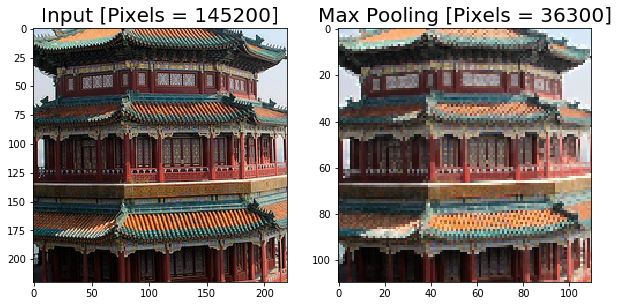

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.imshow(img)
ax1.set_title('Input [Pixels = {}]'.format(img.shape[0] * img.shape[1] * img.shape[2]),\
             fontsize=20);

ax2.imshow(output[0])
ax2.set_title('Max Pooling [Pixels = {}]'.format(output[0].shape[0] * output[0].shape[1] * output[0].shape[2]),\
             fontsize=20);


### Avg Pooling

In [8]:
avg_pool = tf.keras.layers.AvgPool2D(pool_size=2)
img = img.astype(np.float32)
output = avg_pool(img.reshape(1,img.shape[0], img.shape[1], 3))

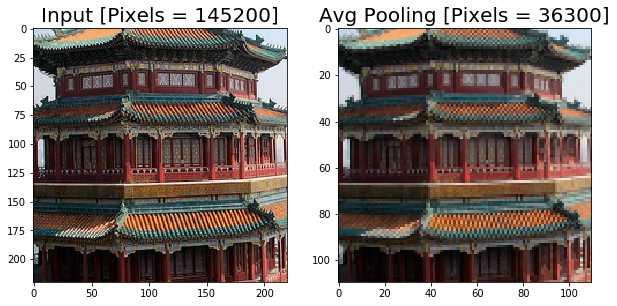

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.imshow(np.array(img).astype('uint8'))
ax1.set_title('Input [Pixels = {}]'.format(img.shape[0] * img.shape[1] * img.shape[2]),\
             fontsize=20);

ax2.imshow(np.array(output[0]).astype('uint8'))
ax2.set_title('Avg Pooling [Pixels = {}]'.format(output[0].shape[0] * output[0].shape[1] * output[0].shape[2]),\
             fontsize=20);

# 4. Vanilla/Baseline CNN implementation for Image Classification 

The main components for implementing machine learning algorithms are:

1. Data
2. Model
3. Training
4. Testing

## 4.1 Data

The MNIST data is split into three parts: 60,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test).

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are mnist.train.images and the training labels are mnist.train.labels.

Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:

![https://www.tensorflow.org/images/MNIST-Matrix.png](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each image in MNIST has a corresponding label, a number between 0 and 9 representing the digit drawn in the image.

In [10]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas

# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
def plotImgs(images):
    fig, axes = plt.subplots(5, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img, cmap='gray')
    plt.tight_layout()
    plt.show()

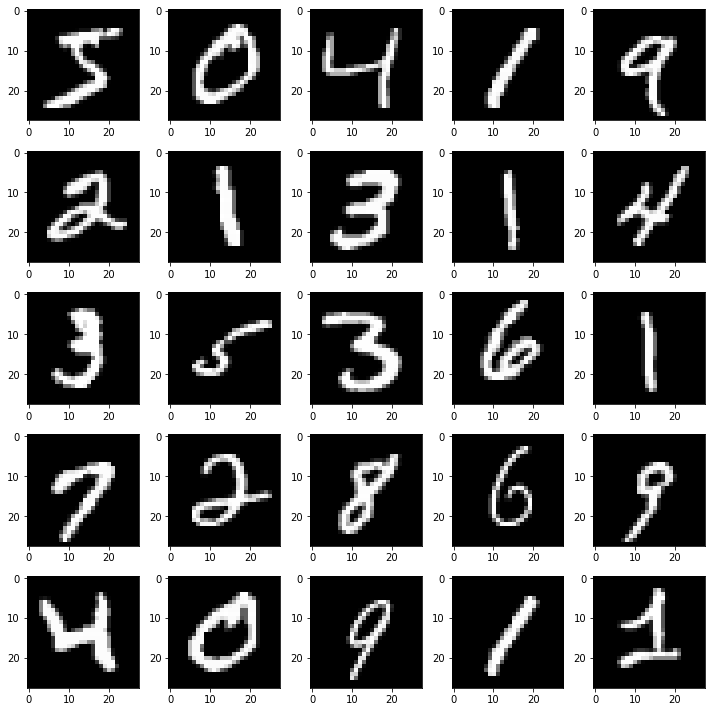

In [12]:
#plt.imshow(x_train[2],cmap='gray')
images = [x_train[i] for i in range(25)]
plotImgs(images)

In [13]:
# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = pandas.get_dummies(y_train)
y_test = pandas.get_dummies(y_test)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1) # add depth dimension of the inputs
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

## 4.2 Model

### Vanilla / Baseline CNN
**LeNet, used for digit classification in the 90's**

Yann LeCun, Leon Bottou, Yosuha Bengio and Patrick Haffner proposed a neural network architecture for handwritten character recognition in 1990’s which they called LeNet-5. This is oftentimes used as the baseline CNN model that is trained. 

(Y. Lecun, L. Bottou, Y. Bengio and P. Haffner, "Gradient-based learning applied to document recognition," in Proceedings of the IEEE, vol. 86, no. 11, pp. 2278-2324, Nov. 1998, doi: 10.1109/5.726791)

![](./imgs/lenet.png)

### First layer:

Input is a 32×32 grayscale image which passes through the first convolutional layer with 6 feature maps or filters having size 5×5 and a stride of one. The image dimensions changes from 32x32x1 to 28x28x6.

![](imgs/lenet1.png)

In [15]:
# first layer
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), padding = 'same', \
                        activation='relu', input_shape=(28,28,1)))

### Second Layer:

Then the LeNet-5 applies average pooling layer or sub-sampling layer with a filter size 2×2 and a stride of two. The resulting image dimensions will be reduced to 14x14x6.

![](imgs/lenet2.png)

In [16]:
#second layer
model.add(layers.AveragePooling2D())

### Third Layer:

Next, there is a second convolutional layer with 16 feature maps having size 5×5 and a stride of 1. The main reason is to break the symmetry in the network and keeps the number of connections within reasonable bounds.

![](imgs/lenet3.png)

In [17]:
#Third layer
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

### Fourth Layer:

The fourth layer (S4) is again an average pooling layer with filter size 2×2 and a stride of 2.

![](imgs/lenet4.png)

In [18]:
# Fourth layer
model.add(layers.AveragePooling2D())

### Fifth Layer:

The fifth layer (C5) is a fully connected convolutional layer with 120 feature maps each of size 1×1. Each of the 120 units in C5 is connected to all the 400 nodes (5x5x16) in the fourth layer S4. 

![](imgs/lenet5.png)

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))

### Sixth Layer:

The sixth layer is a fully connected layer (F6) with 84 units.

![](imgs/lenet6.png)

In [20]:
#Sixth layer
model.add(layers.Dense(units=84, activation='relu'))

### Output Layer:

Finally, there is a fully connected softmax output layer ŷ with 10 possible values corresponding to the digits from 0 to 9.
Fully Connected Output Layer

![](imgs/lenet7.png)

In [21]:
# Output layer
model.add(layers.Dense(units=10, activation = 'softmax'))

### Model Summary:

![](imgs/lenet_summary.png)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [23]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, \
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

## 4.3 Training

In [24]:
hist = model.fit(x=x_train,y=y_train, epochs=10, \
                 batch_size=128, validation_data=(x_test, y_test), \
                 verbose=1) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3503 - accuracy: 0.8993 - val_loss: 0.1108 - val_accuracy: 0.9640
Epoch 2/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0938 - accuracy: 0.9711 - val_loss: 0.0594 - val_accuracy: 0.9804
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0653 - accuracy: 0.9796 - val_loss: 0.0501 - val_accuracy: 0.9837
Epoch 4/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0537 - accuracy: 0.9832 - val_loss: 0.0476 - val_accuracy: 0.9842
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0387 - val_accuracy: 0.9876
Epoch 6/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0414 - val_accuracy: 0.9863
Epoch 7/10
60000/60000 [=========================

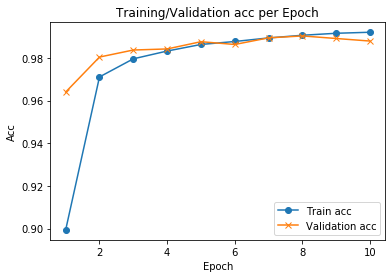

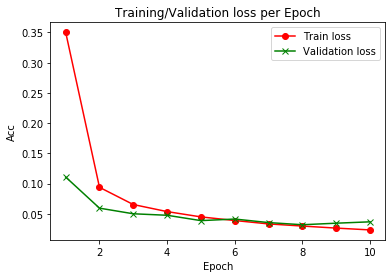

In [25]:
# plot model accuracy / epoch
def plot_loss_acc(hist):
    f, ax = plt.subplots()
    ax.plot([None] + hist.history['accuracy'], 'o-')
    ax.plot([None] + hist.history['val_accuracy'], 'x-')
    # Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Train acc', 'Validation acc'], loc = 0)
    ax.set_title('Training/Validation acc per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Acc') 
    plt.plot()
    
    f, ax = plt.subplots()
    ax.plot([None] + hist.history['loss'], 'o-',c='r')
    ax.plot([None] + hist.history['val_loss'], 'x-',c='g')
    # Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Train loss', 'Validation loss'], loc = 0)
    ax.set_title('Training/Validation loss per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Acc') 
    plt.plot()
plot_loss_acc(hist)

## 4.4 Testing

In [26]:
val_pred_class = model.predict(x_test,verbose=0) # predict image classes 
y = y_test.to_numpy()

Prediction: 7
Ground-Truth: 7


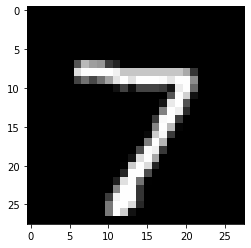

Prediction: 2
Ground-Truth: 2


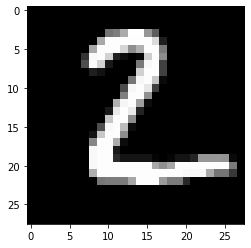

Prediction: 1
Ground-Truth: 1


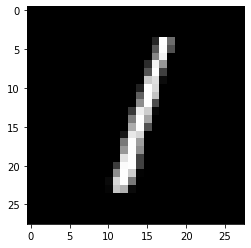

Prediction: 0
Ground-Truth: 0


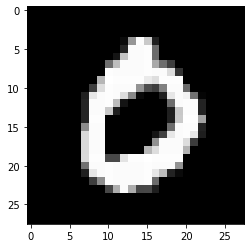

Prediction: 4
Ground-Truth: 4


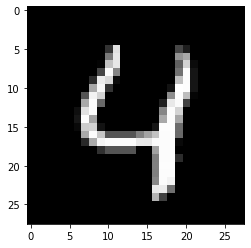

Prediction: 1
Ground-Truth: 1


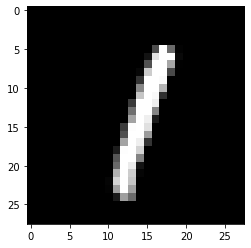

Prediction: 4
Ground-Truth: 4


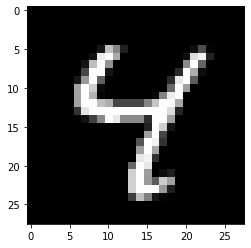

Prediction: 9
Ground-Truth: 9


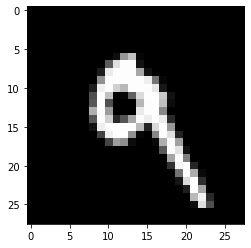

Prediction: 5
Ground-Truth: 5


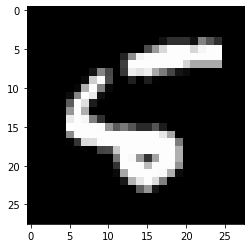

Prediction: 9
Ground-Truth: 9


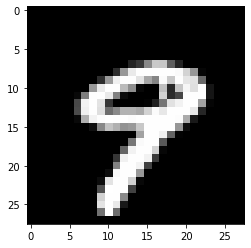

Prediction: 0
Ground-Truth: 0


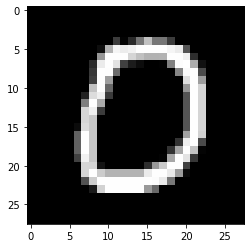

Prediction: 6
Ground-Truth: 6


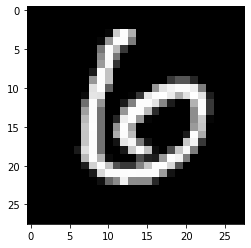

Prediction: 9
Ground-Truth: 9


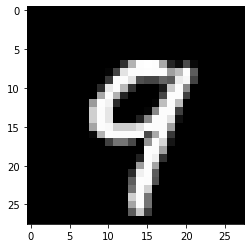

Prediction: 0
Ground-Truth: 0


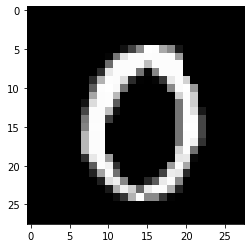

Prediction: 1
Ground-Truth: 1


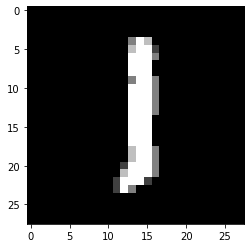

In [27]:
images = [x_test[i,:,:,0] for i in range(15)]

for i in range(15):
    
    plt.imshow(images[i], cmap='gray')
    print('Prediction:', val_pred_class[i].argmax())
    print('Ground-Truth:',y[i].argmax())
    plt.show()